# Peaks Detection

## Example 1: * A simple time-series*

#### reference & data:
- data : https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv
- reference: https://www.researchgate.net/profile/Girish_Palshikar/publication/228853276_Simple_Algorithms_for_Peak_Detection_in_Time-Series/links/53fd70ca0cf2364ccc08c4d8.pdf

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline

#### Load Data

In [2]:
milk_data = pd.read_csv('milk_production.csv')
milk_data.head()

,Unnamed: 0,Month,Monthly milk production (pounds per cow)
0,0,1962-01,589
1,1,1962-02,561
2,2,1962-03,640
3,3,1962-04,656
4,4,1962-05,727


#### Get the time series data

In [3]:
time_series = milk_data['Monthly milk production (pounds per cow)']

### THE PEAK DETECTION FUNCTION

In [51]:
def peak_finding(data,window_size):
    """
    find values and positions of peaks in a given time series data. 
    return a list of tuples [(x1, max1), (x2, max2),..,(xn, maxn)]
    
    data :       a given time series data
    window_size: look for peaks in a box of "window_size" size

    """
    data_extended = np.concatenate([np.zeros(window_size),data,np.zeros(window_size)])
    max_list = []
        
    for i,value in enumerate(data_extended):
        if (i >= window_size) and (i < len(data_extended)-window_size):
            try:
                max_left = data_extended[(i-window_size):i+1].max()
                max_right = data_extended[i:(i+window_size)+1].max()
                chek_value = data_extended[i] - ((max_left+max_right)/2)
            except ValueError:
                 pass
                
            if (chek_value >=0):
                max_list.append((i-window_size,data[(i-window_size)]))
    return max_list

#### Find Peaks

In [46]:
# Find peaks with a windows size of 4
peaks_list_4 = peak_finding(time_series,4)
x_peaks_4 = [ x for x,y in peaks_list_4 ]
y_peaks_4 = [ y for x,y in peaks_list_4 ]

# Find peaks with a windows size of 1
peaks_list_1 = peak_finding(time_series,1)
x_peaks_1 = [ x for x,y in peaks_list_1 ]
y_peaks_1 = [ y for x,y in peaks_list_1 ]


#### Graphs

##### Graph for peaks with windows_size = 4

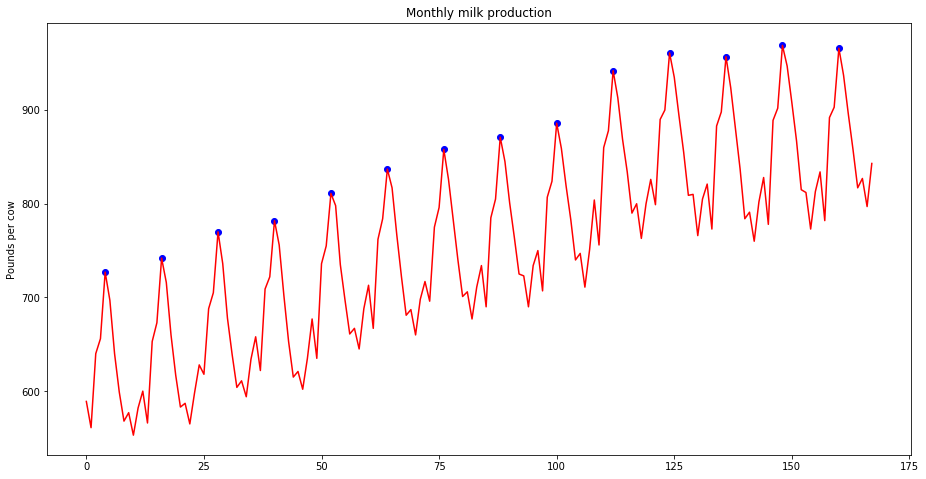

In [6]:
# create figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])

# set labels
ax.set_ylabel('Pounds per cow')
ax.set_title('Monthly milk production')

# plot graphs
ax.plot(time_series,color='red');

# Peaks with a windows size of 4
ax.scatter(x_peaks_4,y_peaks_4,color='blue');


##### Graph for peaks with windows_size = 1

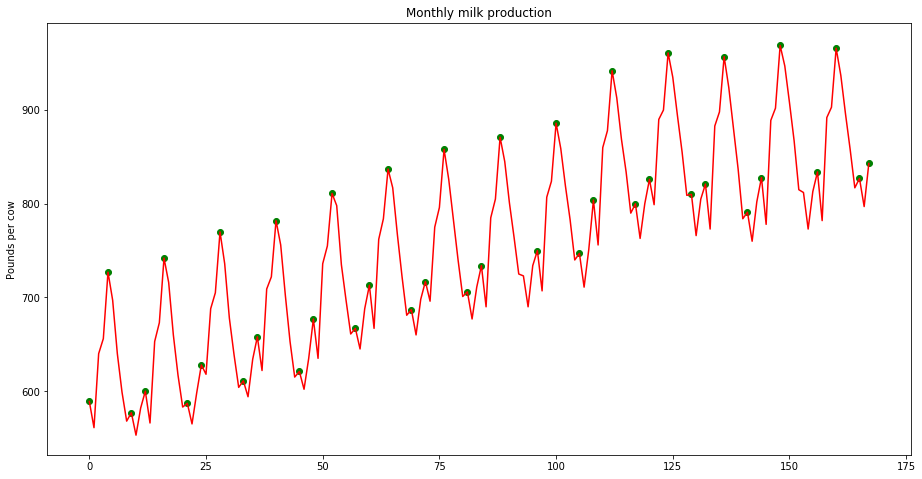

In [7]:
# create figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])

# set labels
ax.set_ylabel('Pounds per cow')
ax.set_title('Monthly milk production')

# plot graphs
ax.plot(time_series,color='red');

# Peaks with a windows size of 1
ax.scatter(x_peaks_1,y_peaks_1,color='green');


## Example 2: * A noisy signal*

#### reference & data:
- https://stackoverflow.com/questions/29992174/scipy-fft-frequency-analysis-of-very-noisy-signal
- https://www.dropbox.com/s/3hdaej7io32vycb/signal.xlsx?dl=0

#### Load Data

In [15]:
data = pd.read_excel('signal.xlsx', names=['response'] )

In [16]:
data.head()

,response
0,1.561581
1,1.562953
2,1.562588
3,1.565073
4,1.568203


In [69]:
signal = data['response']

#### Find Peaks

In [71]:
# Find peaks with a windows size of 80
peaks_noisy= peak_finding(signal,80)

# Unpack (x,y) 
x_noisy = [ x for x,y in peaks_noisy ]
y_noisy = [ y for x,y in peaks_noisy ]

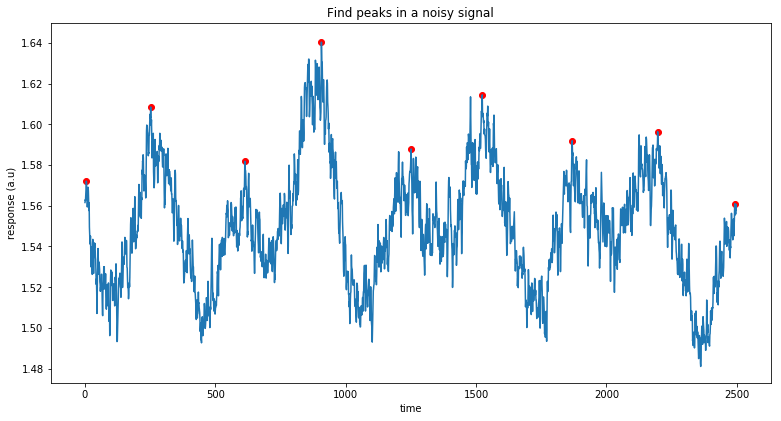

In [81]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])  
ax.set_title('Find peaks in a noisy signal')
ax.set_xlabel('time')
ax.set_ylabel('response (a.u)')
ax.plot(signal)
ax.scatter(x_noisy,y_noisy, color='red');